# Notes

This notebook is merely me trying to use various features of the common machine learning libraries.

The analysis done in this notebook is not necessarily good/reasonable.

# Task

Contest: [url](https://www.kaggle.com/c/titanic/data)

**Build a predictive model that answers the question: “what sorts of people were more likely to survive?” using passenger data (ie name, age, gender, socio-economic class, etc).**

# Input Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math

In [2]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

In [3]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


There are 12 variables in the training set:
* `PassengerId`: passenger id
* `Survived`: whether the passenger survived (0 = No, 1 = Yes)
* `Pclass`: ticket class (1 = 1st, 2 = 2nd, 3 = 3rd)
* `Name`: name
* `Sex`: sex
* `Age`: age in years
* `SibSp`: number of siblings/spouses aboard the Titanic
* `Parch`: number of parents or children aboard the Titanic
* `Ticket`: Ticket number
* `Fare`: Passenger fare
* `Cabin`: Cabin number
* `Embarked`: Port of Embarkation (C = Cherbourg, Q = Queenstown, S = Southampton)`

We drop some columns: `PassengerID`, `Name`, `Ticket`, `Cabin`
* `PassengerID`, `Name`, and `Ticket` do not seem to give us any useful information.
* The `Cabin` column is rather complex to process and has a lot of `NaN` values (687/891, or 77.1%). 

In [5]:
dropped_cols = ['PassengerId', 'Name', 'Ticket', 'Cabin']
df_train.drop(labels=dropped_cols, axis=1, inplace=True)
df_test.drop(labels=dropped_cols, axis=1, inplace=True)

In [6]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(df_train)

     Survived  Pclass     Sex    Age  SibSp  Parch      Fare Embarked
0           0       3    male  22.00      1      0    7.2500        S
1           1       1  female  38.00      1      0   71.2833        C
2           1       3  female  26.00      0      0    7.9250        S
3           1       1  female  35.00      1      0   53.1000        S
4           0       3    male  35.00      0      0    8.0500        S
5           0       3    male    NaN      0      0    8.4583        Q
6           0       1    male  54.00      0      0   51.8625        S
7           0       3    male   2.00      3      1   21.0750        S
8           1       3  female  27.00      0      2   11.1333        S
9           1       2  female  14.00      1      0   30.0708        C
10          1       3  female   4.00      1      1   16.7000        S
11          1       1  female  58.00      0      0   26.5500        S
12          0       3    male  20.00      0      0    8.0500        S
13          0       

In [7]:
cat_features = ['Pclass', 'Sex', 'Embarked']
num_features = ['Age', 'SibSp', 'Parch', 'Fare']

# X_train = df_train[cat_features + num_features]
# Y_train = df_train['Survived']
# X_test = df_test

In order to predict survivability of each passenger, we have 7 features:
* 3 categorical features:
  * `Survived`
  * `Pclass`
  * `Sex`
  * `Embarked`
* 4 numerical features:
  * `Age`
  * `SibSp`
  * `Parch`
  * `Fare`

In [8]:
# assert all(feature in X_train.columns for feature in cat_features)
# assert all(feature in X_test.columns for feature in num_features)

# for feature in cat_features:
#     X_train.loc[:, [feature]] = X_train.loc[:, [feature]].astype('category');

In [9]:
df_train.dtypes

Survived      int64
Pclass        int64
Sex          object
Age         float64
SibSp         int64
Parch         int64
Fare        float64
Embarked     object
dtype: object

# Exploratory Data Analysis (EDA)

## Overview

* There are 891 examples in the training set.

## Categorical features

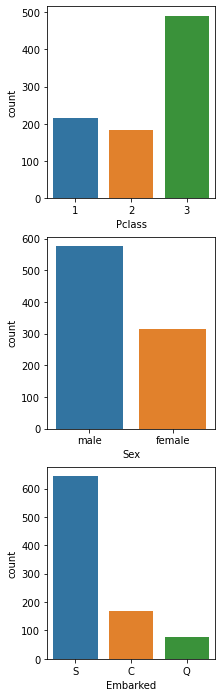

In [10]:
fig, axes = plt.subplots(len(cat_features), 1, figsize=(3, len(cat_features) * 4))
for feature, ax in zip(cat_features, axes.reshape(-1)):
    sns.countplot(data=df_train, x=feature, ax=ax)

## Numerical features

In [11]:
df_train[num_features]

,Age,SibSp,Parch,Fare
0,22.0,1,0,7.2500
1,38.0,1,0,71.2833
2,26.0,0,0,7.9250
3,35.0,1,0,53.1000
4,35.0,0,0,8.0500
...,...,...,...,...
886,27.0,0,0,13.0000
887,19.0,0,0,30.0000
888,NaN,1,2,23.4500
889,26.0,0,0,30.0000


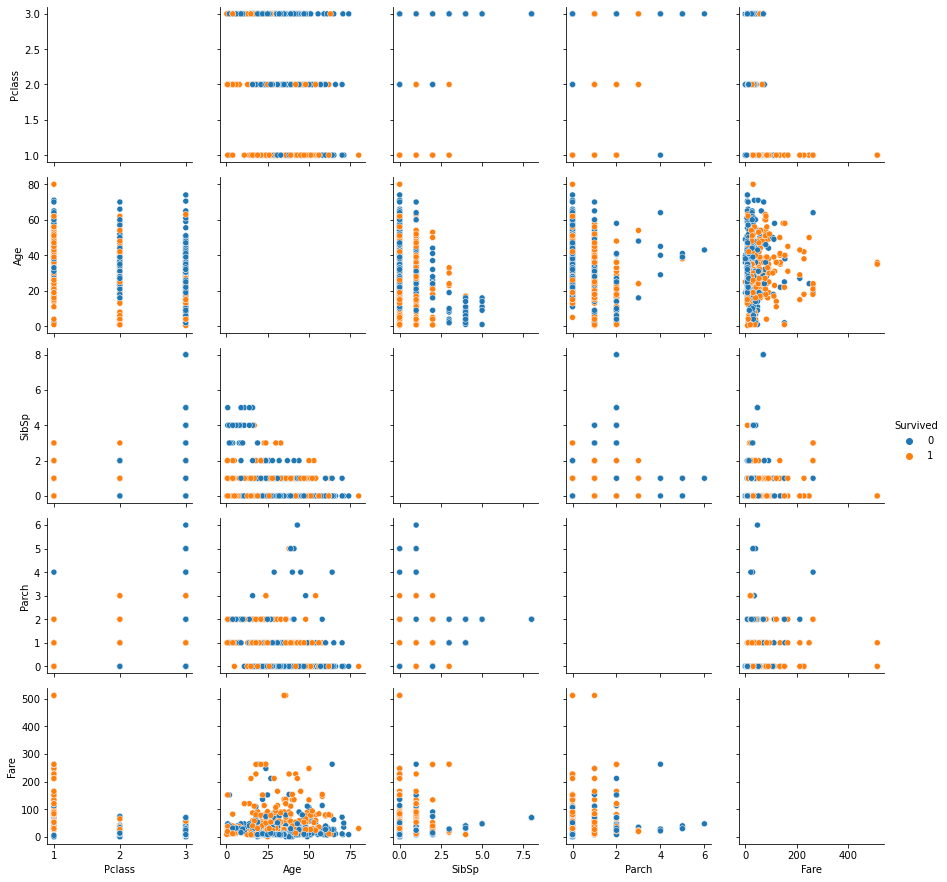

In [12]:
g = sns.PairGrid(df_train, hue='Survived')
# g.map_diag(sns.histplot)
g.map_offdiag(sns.scatterplot)
g.add_legend()

In [13]:
df_train['Age']

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888     NaN
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64

<AxesSubplot:xlabel='Age', ylabel='Count'>

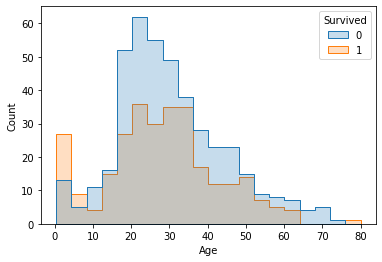

In [14]:
sns.histplot(x='Age', hue='Survived', data=df_train, element='step')

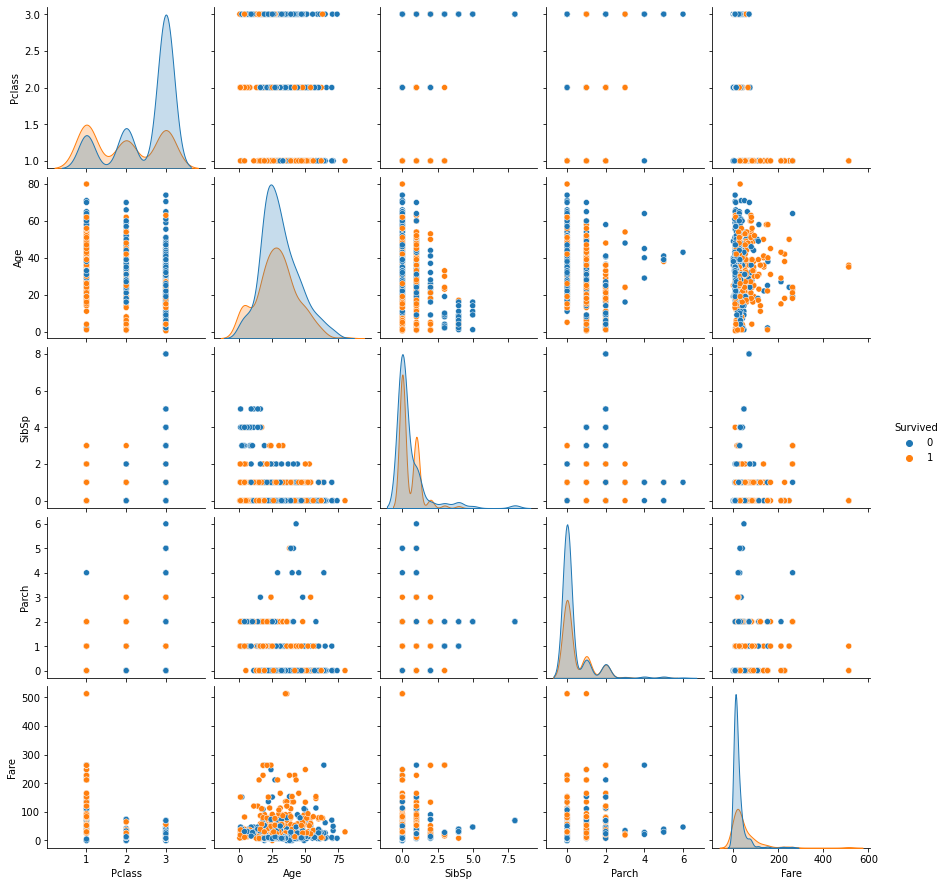

In [15]:
g = sns.pairplot(df_train, hue='Survived')

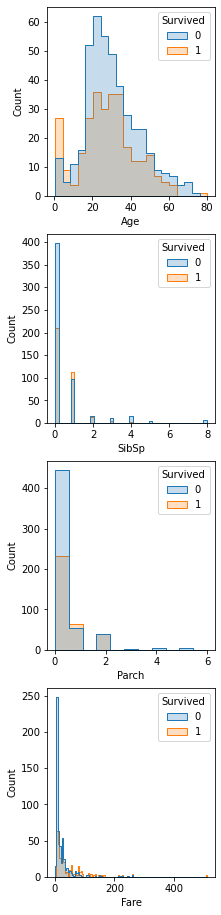

In [16]:
fig, axes = plt.subplots(len(num_features), 1, figsize=(3, len(num_features) * 4))
for feature, ax in zip(num_features, axes.reshape(-1)):
    sns.histplot(data=df_train, x=feature, ax=ax, hue='Survived', element='step')

# Data Preparation

## Imputation

In [17]:
df_train.columns[df_train.isna().any()].tolist()

['Age', 'Embarked']

There are two columns having `NaN` values in the training set: `Age` and `Embarked`.

In [18]:
df_test.columns[df_test.isna().any()].tolist()

['Age', 'Fare']

In [19]:
df_train.isna().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

In [20]:
df_test.isna().sum()

Pclass       0
Sex          0
Age         86
SibSp        0
Parch        0
Fare         1
Embarked     0
dtype: int64

I remove all rows without age, since I cannot think of any good imputing strategy here. For instance, imputing by replacing `NaN` with the mean age does not make sense here, since there were more children and old people survived than people having their ages around the mean value.

I also remove all rows with empty `Embarked` values. This is a categorical variable, so using a mean imputer will not work. On the other hand, there are only 2 rows without `Embarked` values. Therefore, removing them would not cause any significant change to the dataset.

In [21]:
df_train = df_train.dropna(subset=['Age', 'Embarked'])
df_test = df_test.dropna(subset=['Age', 'Fare'])

## Split features and labels

In [22]:
X_train = df_train[num_features + cat_features]
Y_train = df_train['Survived']
X_test = df_test

## Encoding

In [23]:
Y_train

0      0
1      1
2      1
3      1
4      0
      ..
885    0
886    0
887    1
889    1
890    0
Name: Survived, Length: 712, dtype: int64

## Encoding Categorical features

Some ML algorithms only takes numerical values. Therefore, we should convert all categorical features into some numerical form. This is called encoding.

In [24]:
X_train[cat_features].columns.tolist()

['Pclass', 'Sex', 'Embarked']

* `Sex`: since there are only two different values, we can use binary encoding: `0` for female and `1` for male, for instance.
* `Pclass`: ticket classesj may have an order, and in that case we may consider using `OrdinalEncoding`. However, `OrdinalEncoding` makes handling unknown a bit more complicated than `OneHotEncoder`.
* `Embarked`: since the data has no order, `OneHotEncoder` is the sensible choice here.

In [25]:
from sklearn.preprocessing import OrdinalEncoder

In [26]:
from sklearn.preprocessing import OneHotEncoder

## Column Transformer

In [27]:
from sklearn.compose import ColumnTransformer

cat_encoder = ColumnTransformer(
    [
        ('ordinal encode Sex', OrdinalEncoder(), ['Sex']),
        ('one-hot encode Pclass', OneHotEncoder(), ['Pclass']),
        ('one-hot encode Embarked', OneHotEncoder(), ['Embarked']),
    ],
    remainder='passthrough'
)

Z_data = cat_encoder.fit_transform(X_train)

In [28]:
Z = pd.DataFrame(Z_data)

In [29]:
Z

,0,1,2,3,4,5,6,7,8,9,10
0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,22.0,1.0,0.0,7.2500
1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,38.0,1.0,0.0,71.2833
2,0.0,0.0,0.0,1.0,0.0,0.0,1.0,26.0,0.0,0.0,7.9250
3,0.0,1.0,0.0,0.0,0.0,0.0,1.0,35.0,1.0,0.0,53.1000
4,1.0,0.0,0.0,1.0,0.0,0.0,1.0,35.0,0.0,0.0,8.0500
...,...,...,...,...,...,...,...,...,...,...,...
707,0.0,0.0,0.0,1.0,0.0,1.0,0.0,39.0,0.0,5.0,29.1250
708,1.0,0.0,1.0,0.0,0.0,0.0,1.0,27.0,0.0,0.0,13.0000
709,0.0,1.0,0.0,0.0,0.0,0.0,1.0,19.0,0.0,0.0,30.0000
710,1.0,1.0,0.0,0.0,1.0,0.0,0.0,26.0,0.0,0.0,30.0000


## Feature Scaling

Features come in different scales. To ensure that most algorithms will work properly, we use feature scaling.

In [30]:
from sklearn.preprocessing import StandardScaler

## Data Preparation Pipeline

In [31]:
from sklearn.pipeline import Pipeline

In [32]:
data_prep_pipeline = Pipeline([
    ('cat_encoder', cat_encoder),
    ('std_scaler', StandardScaler()),
])

In [33]:
X_train = data_prep_pipeline.fit_transform(X_train)
X_test = data_prep_pipeline.fit_transform(X_test)

# Classification Models

## Helpers

In [34]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score

In [35]:
clf = {}
Y_pred = {}

In [36]:
def plot_confusion_matrix(Y_true, Y_pred, classes, title):
    fig = plt.figure(); ax = fig.add_subplot(111)
    sns.heatmap(confusion_matrix(Y_true, Y_pred), cmap='coolwarm', ax=ax)
    ax.set_xticklabels(classes)
    ax.set_yticklabels(classes)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title(title)

In [37]:
def confusion_matrix_table(Y_true, Y_pred, classes):
    return pd.DataFrame(
        confusion_matrix(Y_train, Y_pred),
        index=[['True'] * len(classes), classes],
        columns=[['Predicted'] * len(classes), classes]
    )

## Decision Tree Classifier

In [38]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_text

clf['decision_tree'] = DecisionTreeClassifier()

In [39]:
clf['decision_tree'].fit(X_train, Y_train)

DecisionTreeClassifier()

In [40]:
Y_pred['decision_tree'] = clf['decision_tree'].predict(X_train)

In [41]:
accuracy_score(Y_train, Y_pred['decision_tree'])

0.9859550561797753

In [42]:
confusion_matrix_table(
    Y_true=Y_train,
    Y_pred=Y_pred['decision_tree'],
    classes=['Dead', 'Alive'],
)

Predicted      
                Dead Alive
True Dead        424     0
     Alive        10   278

In [62]:
print(f"Precision Score: {precision_score(Y_train, Y_pred['decision_tree'])}")
print(f"Recall Score: {recall_score(Y_train, Y_pred['decision_tree'])}")

Precision Score: 1.0
Recall Score: 0.9652777777777778


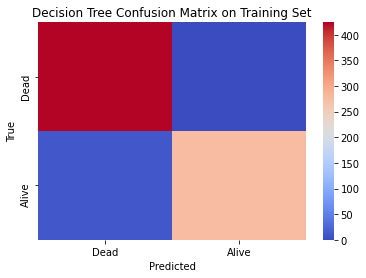

In [44]:
plot_confusion_matrix(
    Y_true=Y_train,
    Y_pred=Y_pred['decision_tree'],
    classes=['Dead', 'Alive'],
    title='Decision Tree Confusion Matrix on Training Set'
)

## Support-Vector Classifier

In [45]:
from sklearn.svm import SVC

clf['svc'] = SVC()
clf['svc'].fit(X_train, Y_train)

SVC()

In [46]:
Y_pred['svc'] = clf['svc'].predict(X_train)

In [47]:
accuracy_score(Y_train, Y_pred['svc'])

0.8356741573033708

In [48]:
confusion_matrix_table(
    Y_true=Y_train,
    Y_pred=Y_pred['svc'],
    classes=['Dead', 'Alive'],
)

Predicted      
                Dead Alive
True Dead        404    20
     Alive        97   191

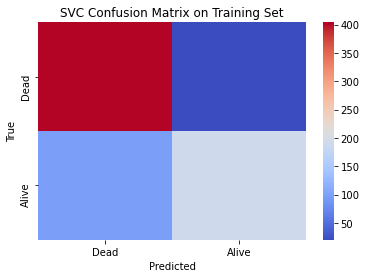

In [49]:
plot_confusion_matrix(
    Y_true=Y_train,
    Y_pred=Y_pred['svc'],
    classes=['Dead', 'Alive'],
    title='SVC Confusion Matrix on Training Set'
)

## Gaussian Naive-Bayes Classifier

In [50]:
from sklearn.naive_bayes import GaussianNB

In [51]:
clf['gaussian_nb'] = GaussianNB()
clf['gaussian_nb'].fit(X_train, Y_train)

GaussianNB()

In [52]:
Y_pred['gaussian_nb'] = clf['gaussian_nb'].predict(X_train)

In [53]:
accuracy_score(Y_train, Y_pred['gaussian_nb'])

0.7780898876404494

In [54]:
confusion_matrix_table(
    Y_true=Y_train,
    Y_pred=Y_pred['gaussian_nb'],
    classes=['Dead', 'Alive'],
)

Predicted      
                Dead Alive
True Dead        371    53
     Alive       105   183

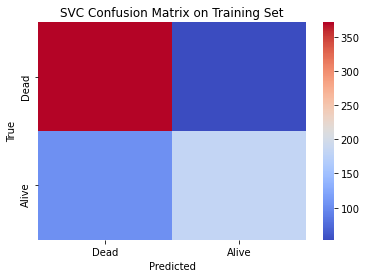

In [55]:
plot_confusion_matrix(
    Y_true=Y_train,
    Y_pred=Y_pred['gaussian_nb'],
    classes=['Dead', 'Alive'],
    title='SVC Confusion Matrix on Training Set'
)

## Random Forest Classifier

In [56]:
from sklearn.ensemble import RandomForestClassifier

In [57]:
clf['random_forest'] = RandomForestClassifier()
clf['random_forest'].fit(X_train, Y_train)

RandomForestClassifier()

In [58]:
Y_pred['random_forest'] = clf['random_forest'].predict(X_train)

In [59]:
accuracy_score(Y_train, Y_pred['random_forest'])

0.9859550561797753

In [60]:
confusion_matrix_table(
    Y_true=Y_train,
    Y_pred=Y_pred['random_forest'],
    classes=['Dead', 'Alive'],
)

Predicted      
                Dead Alive
True Dead        422     2
     Alive         8   280

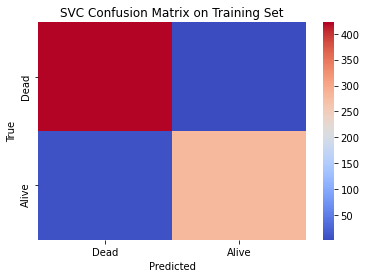

In [63]:
plot_confusion_matrix(
    Y_true=Y_train,
    Y_pred=Y_pred['random_forest'],
    classes=['Dead', 'Alive'],
    title='SVC Confusion Matrix on Training Set'
)

In [64]:
print(f"Precision Score: {precision_score(Y_train, Y_pred['random_forest'])}")
print(f"Recall Score: {recall_score(Y_train, Y_pred['random_forest'])}")

Precision Score: 0.9929078014184397
Recall Score: 0.9722222222222222
